<a href="https://colab.research.google.com/github/altamirano99/Actividad4/blob/main/Actividad_4_(Regresi%C3%B3n_lineal_y_log%C3%ADstica).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerías pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#Cargar archivo excel desde equipo
from google.colab import files
files.upload()

In [5]:
#Carga desde un archivo .csv sin indice
data2=pd.read_excel('microretailer_mit_lift_lab_actualizado.xlsx') 

In [6]:
# Aplicamos filtro por columnas para separar datos cuantitativos y datos cualitativos 50,52 61,62
filtro_cuantitativos_2=data2.iloc[ : , [5,6,13,14,16,21,22,29,31,33,42,58,59,60,90]]
filtro_cualitativos_2=data2.iloc[ : , [0,1,2,3,4,7,8,9,10,11,12,15,17,18,19,20,23,24,25,26,27,28,30,32,34,35,36,37,38,39,40,41,43,44,45,46,47,48,49,51,53,54,55,56,57,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,88,83,84,85,86,87,88,89,91,92,93,94,95,96,97,98,99,100,101,102,103,104]]

In [7]:
#Reemplazamos valores nulos del dataframe con "mean"
filtro_cuantitativos_2=filtro_cuantitativos_2.fillna(round(filtro_cuantitativos_2.mean(),1))

In [8]:
#Corroboramos valores nulos de los datos cuantitativos
valores_nulos=filtro_cuantitativos_2.isnull().sum()
valores_nulos

_latitude                                            0
_longitude                                           0
97_number_of_customers_in_store                      0
268_number_fridges                                   0
104_how_many_shelves_does_the_micro_retailer_have    0
2_current_permanent_employees                        0
4_number_permanent_employees_last_year               0
103_number_own_fridges                               0
145_number_direct_competitors                        0
24_burnout                                           0
272_card_days_receive_money                          0
317_home_deliveries                                  0
62_frequency_only_services                           0
78_number_home_deliveries_week                       0
163_number_high_perishable_products                  0
dtype: int64

In [9]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=filtro_cuantitativos_2

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido _latitude                                            19.114494
_longitude                                          -98.103732
97_number_of_customers_in_store                       5.000000
268_number_fridges                                    5.000000
104_how_many_shelves_does_the_micro_retailer_have    13.500000
2_current_permanent_employees                         3.750000
4_number_permanent_employees_last_year                4.750000
103_number_own_fridges                                2.200000
145_number_direct_competitors                         7.250000
24_burnout                                            3.900000
272_card_days_receive_money                           1.000000
317_home_deliveries                                  11.100000
62_frequency_only_services                            9.400000
78_number_home_deliveries_week                        2.000000
163_number_high_perishable_products                  22.750000
dtype: float64
Limite inferio

In [10]:
#Encontramos Outliers del Dataframe
outliers_iqr=filtro_cuantitativos_2[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]

In [11]:
#Obtenemos datos limpios del Dataframe
data3_iqr=filtro_cuantitativos_2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

In [12]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

_latitude                                             0
_longitude                                            0
97_number_of_customers_in_store                      12
268_number_fridges                                   16
104_how_many_shelves_does_the_micro_retailer_have    22
2_current_permanent_employees                        30
4_number_permanent_employees_last_year               20
103_number_own_fridges                               78
145_number_direct_competitors                        27
24_burnout                                           77
272_card_days_receive_money                          25
317_home_deliveries                                  34
62_frequency_only_services                           51
78_number_home_deliveries_week                        4
163_number_high_perishable_products                  17
dtype: int64

In [13]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data5_iqr=data3_iqr.copy()
data5_iqr=data5_iqr.fillna(round(data3_iqr.mean(),1))

In [14]:
#Reemplazamos valores nulos restantez del dataframe con "bfill" y "ffill"
filtro_cualitativos_2=filtro_cualitativos_2.fillna(method="bfill") 
filtro_cualitativos_2=filtro_cualitativos_2.fillna(method="ffill") 

In [15]:
#Corroboramos valores nulos cualitativos
valores_nulos=filtro_cualitativos_2.isnull().sum()
valores_nulos

_record_id                                        0
_title                                            0
_server_updated_at                                0
_updated_by                                       0
_geometry                                         0
                                                 ..
267_technology_investment_customer_preferences    0
234_willingness_participate_workshop              0
318_shopkeeper_name                               0
319_shopkeepers_last_name                         0
236_whatsapp                                      0
Length: 86, dtype: int64

In [16]:
# Unimos los datos cuantitativos y los datos cualitativos
Datos_limpios_microretailer_mit_lift_lab = pd.concat([filtro_cualitativos_2, data5_iqr], axis=1)

# **Regresión lineal múltiple**

In [ ]:
#Cargar archivo csv desde seaborn
df=Datos_limpios_microretailer_mit_lift_lab
df.head(5)

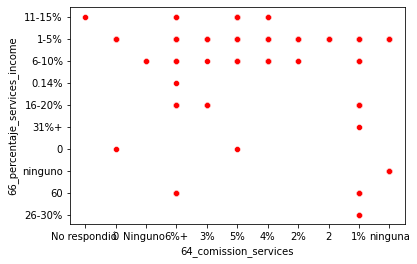

In [18]:
#Se grafican mapas de dispersión de las variables 2 variables
from turtle import color

sns.scatterplot(x='64_comission_services', y='66_percentaje_services_income', color='red', data=df)

In [19]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep=df[['66_percentaje_services_income']]
Var_Dep=df['64_comission_services']

In [20]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [21]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

ValueError: ignored

In [ ]:
#Verficamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['66_percentaje_services_income'], dtype=object)}

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R2 determinación
model.score(Vars_Indep, Var_Dep)

# **2 Regresión lineal múltiple**

In [ ]:
#Cargar archivo csv desde seaborn
df=Datos_limpios_microretailer_mit_lift_lab
df.head(5)

In [ ]:
#Se grafican mapas de dispersión de las variables 2 variables
from turtle import color

sns.scatterplot(x='145_number_direct_competitors', y='24_burnout', color='red', data=df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep=df[['145_number_direct_competitors']]
Var_Dep=df['24_burnout']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

In [ ]:
#Verficamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R2 determinación
model.score(Vars_Indep, Var_Dep)

# **3 Regresión lineal múltiple**

In [ ]:
#Cargar archivo csv desde seaborn
df=Datos_limpios_microretailer_mit_lift_lab
df.head(5)

In [ ]:
#Se grafican mapas de dispersión de las variables 2 variables
from turtle import color

sns.scatterplot(x='78_number_home_deliveries_week', y='275_platform_days_receive_money', color='red', data=df)
sns.scatterplot(x='272_card_days_receive_money', y='275_platform_days_receive_money', color='red', data=df)
sns.scatterplot(x='62_frequency_only_services', y='275_platform_days_receive_money', color='red', data=df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep=df[['78_number_home_deliveries_week', '272_card_days_receive_money', '62_frequency_only_services']]
Var_Dep=df['275_platform_days_receive_money']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

In [ ]:
#Verficamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R2 determinación
model.score(Vars_Indep, Var_Dep)

# **Regresión logistica**

In [22]:
#Declaramos las variables dependientes e independientes para la regresión Logística. Nota: Las variables independientes solo pueden ser númericas
Vars_Indep=df['2_current_permanent_employees']
Vars_Dep=df['20_reviews_finances_monthly']

In [23]:
#Redefinimos las variables
X=Vars_Indep
y=Vars_Dep

In [24]:
#Definimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

In [25]:
#Se escalan los datos
escalar=StandardScaler()

In [41]:
#Convertir DataFrame a CSV
Datos_limpios_microretailer_mit_lift_lab.to_csv("Datos_limpios_microretailer_mit_lift_lab.csv")
#descargar archivo filtrado en csv
from google.colab import files 
files.download("Datos_limpios_microretailer_mit_lift_lab.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
vis=df.iloc[ : , [18,92]]
vis

,20_reviews_finances_monthly,4_number_permanent_employees_last_year
0,yes,1.9
1,no,2.5
2,no,2.5
3,no,0.0
4,yes,2.5
...,...,...
325,yes,2.5
326,yes,2.5
327,yes,2.5
328,yes,2.5


In [45]:
#Para realizar el escalamiento de las variables "X" tanto de entrenamiento como prueba, utilizaremos fit_transform
X_train=escalar.fit_transform(X_train)
X_test=escalar.transform(X_test)

ValueError: ignored

In [ ]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo=LogisticRegression()

In [ ]:
#Entrenamos el modelos 
algoritmo.fit(X_train, y_train)

In [ ]:
#Realizamos una predicción
y_pred=algoritmo.predict(X_test)
y_pred

In [ ]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred)
print('Matriz de confusión')
print(matriz)


In [ ]:
#Cálculo de precisión del modelo
from sklearn.metrics import precision_score

precision=precision_score(y_test, y_pred, average='binary', pos_label='yes')
print('Precisión del modelo:')
print(precision)

In [ ]:
#Cálculo de la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud=accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

In [ ]:
#Cálculo de la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad=recall_score(y_test, y_pred, average='binary', pos_label='yes')
print('Sensibilidad del modelo:')
print(sensibilidad)

# **2 analisis logistico**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión Logística. Nota: Las variables independientes solo pueden ser númericas
Vars_Indep=df['163_number_high_perishable_products']
Vars_Dep=df['99_does_the_micro_retailer_exhibits_products_outside_']

In [ ]:
#Redefinimos las variables
X=Vars_Indep
y=Vars_Dep

In [ ]:
#Definimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

In [ ]:
#Se escalan los datos
escalar=StandardScaler()

In [ ]:
#Para realizar el escalamiento de las variables "X" tanto de entrenamiento como prueba, utilizaremos fit_transform
X_train=escalar.fit_transform(X_train)
X_test=escalar.transform(X_test)

In [ ]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo=LogisticRegression()

In [ ]:
#Entrenamos el modelos 
algoritmo.fit(X_train, y_train)

In [ ]:
#Realizamos una predicción
y_pred=algoritmo.predict(X_test)
y_pred

In [ ]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred)
print('Matriz de confusión')
print(matriz)


In [ ]:
#Cálculo de precisión del modelo
from sklearn.metrics import precision_score

precision=precision_score(y_test, y_pred, average='binary', pos_label='yes')
print('Precisión del modelo:')
print(precision)

In [ ]:
#Cálculo de la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud=accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

In [ ]:
#Cálculo de la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad=recall_score(y_test, y_pred, average='binary', pos_label='yes')
print('Sensibilidad del modelo:')
print(sensibilidad)

# **3 analisis logistico**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión Logística. Nota: Las variables independientes solo pueden ser númericas
Vars_Indep=df['145_number_direct_competitors']
Vars_Dep=df['227_agreement_ecommerce_platforms']

In [ ]:
#Redefinimos las variables
X=Vars_Indep
y=Vars_Dep

In [ ]:
#Definimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

In [ ]:
#Se escalan los datos
escalar=StandardScaler()

In [ ]:
#Para realizar el escalamiento de las variables "X" tanto de entrenamiento como prueba, utilizaremos fit_transform
X_train=escalar.fit_transform(X_train)
X_test=escalar.transform(X_test)

In [ ]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo=LogisticRegression()

In [ ]:
#Entrenamos el modelos 
algoritmo.fit(X_train, y_train)

In [ ]:
#Realizamos una predicción
y_pred=algoritmo.predict(X_test)
y_pred

In [ ]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred)
print('Matriz de confusión')
print(matriz)


In [ ]:
#Cálculo de precisión del modelo
from sklearn.metrics import precision_score

precision=precision_score(y_test, y_pred, average='binary', pos_label='yes')
print('Precisión del modelo:')
print(precision)

In [ ]:
#Cálculo de la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud=accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

In [ ]:
#Cálculo de la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad=recall_score(y_test, y_pred, average='binary', pos_label='yes')
print('Sensibilidad del modelo:')
print(sensibilidad)